In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Facebook_Marketplace_data.csv to Facebook_Marketplace_data.csv


In [3]:
df=pd.read_csv('Facebook_Marketplace_data.csv')
print(df.head)

<bound method NDFrame.head of       status_id status_type status_published  num_reactions  num_comments  \
0             1       video   4/22/2018 6:00            529           512   
1             2       photo  4/21/2018 22:45            150             0   
2             3       video   4/21/2018 6:17            227           236   
3             4       photo   4/21/2018 2:29            111             0   
4             5       photo   4/18/2018 3:22            213             0   
...         ...         ...              ...            ...           ...   
7045       7046       photo   9/24/2016 2:58             89             0   
7046       7047       photo  9/23/2016 11:19             16             0   
7047       7048       photo  9/21/2016 23:03              2             0   
7048       7049       photo   9/20/2016 0:43            351            12   
7049       7050       photo  9/10/2016 10:30             17             0   

      num_shares  num_likes  num_loves  num_w

In [4]:
#Create a list of most relevant columns. It contains 9 numerical columns and one 'status_type' column.
clustering_cols = ['status_type',
    'num_reactions',
    'num_comments',
    'num_shares',
    'num_likes',
    'num_loves',
    'num_wows',
    'num_hahas',
    'num_sads',
    'num_angrys']

df_cluster=df[clustering_cols].copy()    #Creating a new, completely independent dataframe (dataset.cluster). Any ML operations on this dataset won't affect the data in the original dataset.

In [5]:
num_cols= df_cluster.columns[1:]
for col in num_cols:
    df_cluster[col] = df_cluster[col].fillna(df_cluster[col].mean())   #this code replaces missing values with mean in columns where the data stored is numerical.

df_cluster['status_type'] =df_cluster['status_type'].fillna(df_cluster['status_type'].mode()[0])

#This replaces missing values with mode for categorical data.

In [6]:
# This step converts the single categorical status_type column into multiple numerical columns (called dummy variables), (eg.status_type_photo, status_type_video, etc.) and removes the original status_type column.

#Rest columns from dataset dataset_cluster remain unchanged.
df_encoded = pd.get_dummies(df_cluster, columns=['status_type'],drop_first=True)

# Now we scale these feature values
X = df_encoded.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
df_encoded.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,False,False,True
1,150,0,0,150,0,0,0,0,0,True,False,False
2,227,236,57,204,21,1,1,0,0,False,False,True
3,111,0,0,111,0,0,0,0,0,True,False,False
4,213,0,0,204,9,0,0,0,0,True,False,False


Q-1	How does the time of upload 'status_published'  affects the 'num_reaction'?

Sol- To solve this problem, we have to extract the 'time of the day' and the 'day of the week' to analyse the effect of these factors on the number of reactions received on the posts.

In [8]:
#First we convert the status_published into a datetime object, and then use the Python's built in datetime accessor (.dt) to extract the specific components.

df_cluster['status_published']= pd.to_datetime(df['status_published'])

#Now we extract the Hour.
df_cluster['publish_hour'] = df_cluster['status_published'].dt.hour

#Now we extract the day of the week
df_cluster['publish_day'] = df_cluster['status_published'].dt.day_name()

#To get a numerical representation (Monday=0, Sunday=6)
df_cluster['publish_weekday'] = df_cluster['status_published'].dt.dayofweek

# Group by Hour by creating another dataframe.
hourly_reactions = df_cluster.groupby('publish_hour')['num_reactions'].mean().reset_index()
print("Average Reactions by Hour\n", hourly_reactions)

# Group by Day
# Ensure correct order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_reactions = df_cluster.groupby('publish_day')['num_reactions'].mean().reindex(day_order)
print("\nAverage Reactions by Day:\n", daily_reactions)

Average Reactions by Hour
     publish_hour  num_reactions
0              0     261.839474
1              1     203.315725
2              2     163.907618
3              3     290.270208
4              4     242.685864
5              5     293.870968
6              6     340.213198
7              7     183.301549
8              8     204.796897
9              9     205.780761
10            10     234.508333
11            11     180.639456
12            12     196.053763
13            13     176.875000
14            14     261.333333
15            15     341.666667
16            16     283.250000
17            17     384.000000
18            18     351.750000
19            19     442.368421
20            20     417.288136
21            21     261.907895
22            22     238.376126
23            23     244.276850

Average Reactions by Day:
 publish_day
Monday       207.198189
Tuesday      197.299712
Wednesday    245.386340
Thursday     262.702950
Friday       232.355446
Saturday     

Visualise these Plots

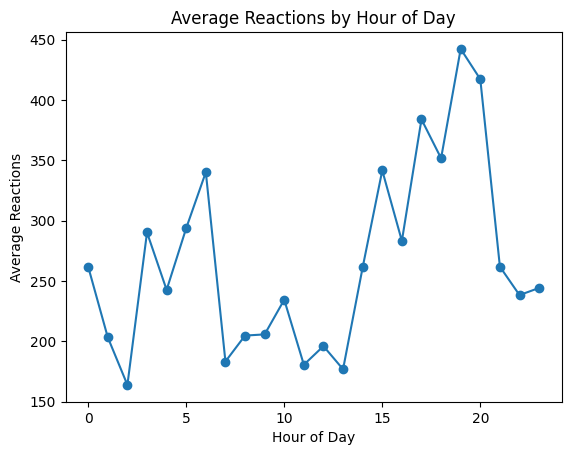

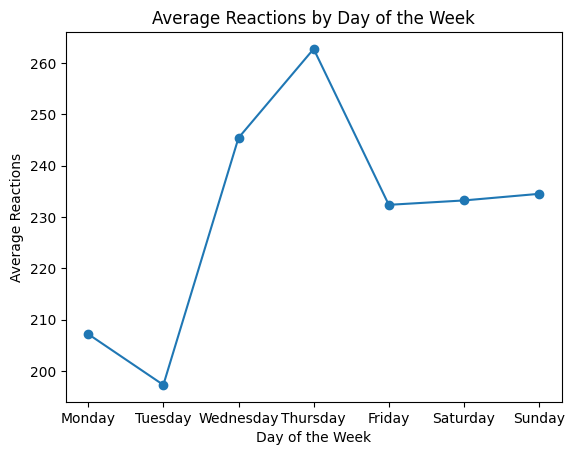

In [9]:
plt.plot(hourly_reactions['publish_hour'], hourly_reactions['num_reactions'], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Reactions')
plt.title('Average Reactions by Hour of Day')
plt.show()

plt.plot(daily_reactions.index, daily_reactions.values, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Reactions')
plt.title('Average Reactions by Day of the Week')
plt.show()

Q2) Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [10]:
correl_matrix=df_cluster[['num_reactions','num_comments','num_shares']].corr()
print(correl_matrix)

#So from the output we see that correlation between num_comments and num_reactions is a positive 0.150843. So if one parameter increases, the other one increases too. However, the magnitude of their proportionately is low (close to 0 not 1).

#Correlation between num_reactions and num_shares is a positive 0.250723. This is a similar situation as the above pair, i.e. the quantities are direcctly proportional but the magnitude of proportionality is low.

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


Q3) Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset

Q4) Use the elbow method to find the optimum number of clusters.

In [11]:
#The data pre processing part is already done. We just have to train our model on this processed, feature engineered and scaled data.

#First we use Elbow method to find the optimal no of clusters for our dataset.

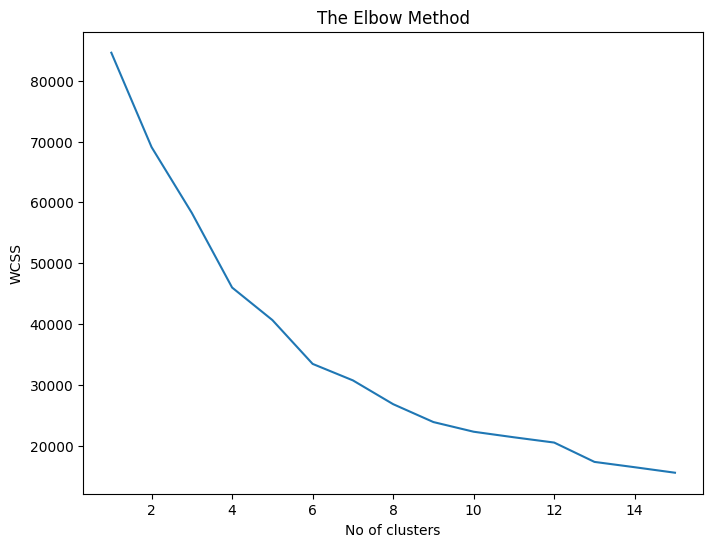

In [12]:
wcss=[]
for i in range (1,16):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=1)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,16),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.savefig('Elbow.png')  #Save the plot for Presentation.
plt.show()

K=6 is the ideal number of clusters. Now train our model by forming six clusters on our dataset.

In [13]:
finalk_means=KMeans(n_clusters=6,init="k-means++", random_state=1)
y_kmeans=finalk_means.fit_predict(X_scaled)

Q5)	What is the count of different types of posts in the dataset?

In [14]:
 #To find the count for different types of posts (photos, videos,status, link), we need to use .value_counts on status column of either df or dataset_cluster (which is essentially just a copy of the most relevant columns of df).

 #We can't use dataset_encoded since it is composed entirely of numerical features (the 9 num_ columns and the 3 one-hot encoded status_type_ columns). The value_counts() method for a DataFrame returns the frequency of each distinct row. Since every single post will likely have a unique combination of 9 numerical engagement metrics, dataset_encoded.value_counts() will simply return a count of 1 for almost every single row, which is meaningless for finding the post type counts. The original string column, status_type, is gone.And we are interested in grouping columns by categorical features.

print(df_cluster['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


Q6)	What is the average value of num_reaction, num_comments, num_shares for each post type?

In [15]:
#We have to groupby the column 'status type'
engagement_cols = ['num_reactions', 'num_comments', 'num_shares']
Avg_engagement = df.groupby('status_type')[engagement_cols].mean()

# Sort by 'num_reactions' for easier interpretation
print(Avg_engagement)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


#Creating Downloadable png files to attach in the PowerPoint Presentation

/tmp/ipython-input-4265597649.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='num_reactions', data=cluster_profiles, ax=axes[0], palette='viridis')
/tmp/ipython-input-4265597649.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='num_comments', data=cluster_profiles, ax=axes[1], palette='plasma')
/tmp/ipython-input-4265597649.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='num_shares', data=cluster_profiles, ax=axes[2], palette='cividis')


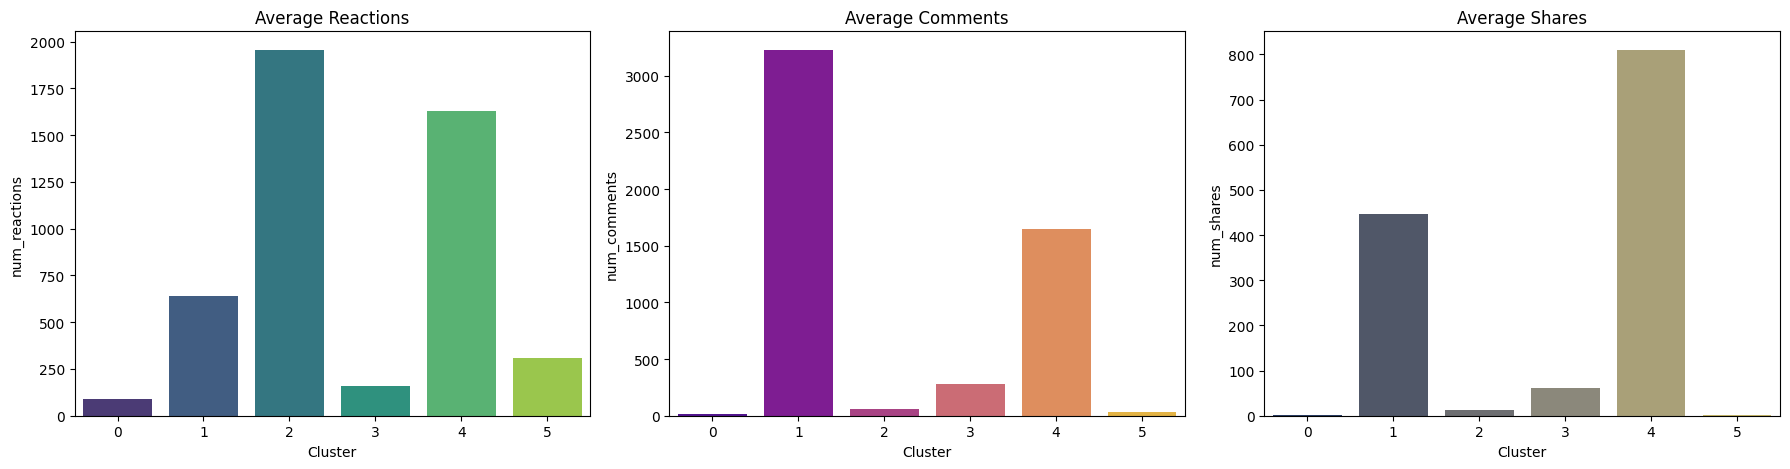

In [17]:
engagement_cols = ['num_reactions', 'num_comments', 'num_shares']

# Use the clusters formed to directly group the data and calculate mean engagement metrics
cluster_profiles = df.groupby(y_kmeans)[engagement_cols].mean().reset_index()
cluster_profiles = cluster_profiles.rename(columns={'index': 'Cluster'})
# Rename the index column to 'Cluster'

# Plot Cluster Profiles
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Average Reactions
sns.barplot(x='Cluster', y='num_reactions', data=cluster_profiles, ax=axes[0], palette='viridis')
axes[0].set_title('Average Reactions')
axes[0].ticklabel_format(style='plain', axis='y') # Prevent scientific notation

# Plot 2: Average Comments
sns.barplot(x='Cluster', y='num_comments', data=cluster_profiles, ax=axes[1], palette='plasma')
axes[1].set_title('Average Comments')
axes[1].ticklabel_format(style='plain', axis='y')

# Plot 3: Average Shares
sns.barplot(x='Cluster', y='num_shares', data=cluster_profiles, ax=axes[2], palette='cividis')
axes[2].set_title('Average Shares')
axes[2].ticklabel_format(style='plain', axis='y')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Save the plot file for the presentation
plt.savefig('cluster_profiles.png')
plt.close()